In [22]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'IMF')

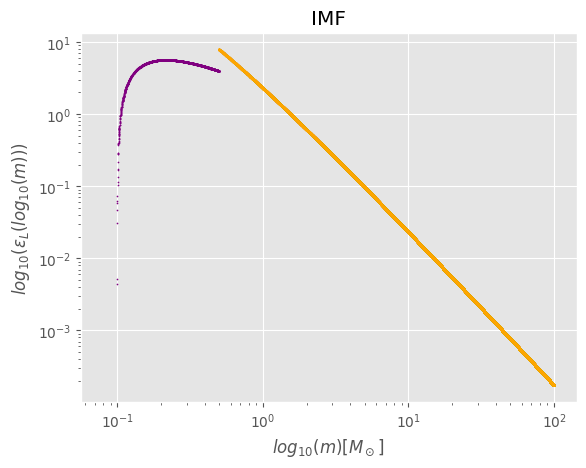

In [23]:
plt.style.use('ggplot')

masa_min=0.08 #en M_sun
masa_max=100  #en M_sun
cantidad=1000000
masas_aleatorias = np.random.uniform(masa_min, masa_max, cantidad)
masas=np.random.shuffle(masas_aleatorias)

#IMF
a1=-1.3
a2=-2.3
grupo1=[]
grupo2=[]

grupo1 = [i for i in masas_aleatorias if i < 0.5]
grupo2 = [i for i in masas_aleatorias if i >= 0.5]
grupo_masas=grupo1+grupo2

y1=[i**a1 for i in grupo1]
y2=[i**a2 for i in grupo2]

log_m1=[np.log(i*10) for i in grupo1]
log_m2=[np.log(i*10) for i in grupo2]

epsilon_L1 = [x * y for x, y in zip(log_m1, y1)]
epsilon_L2 = [x * y for x, y in zip(log_m2, y2)]

plt.scatter(grupo1, epsilon_L1, color='purple', s=0.5)
plt.scatter(grupo2, epsilon_L2, color='orange', s=0.5)
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$log_{10}(m) [M_\odot]$')
plt.ylabel(r'$log_{10}(\epsilon_{L}(log_{10}(m)))$')
plt.title('IMF')

Text(0, 0.5, 'Frecuencia')

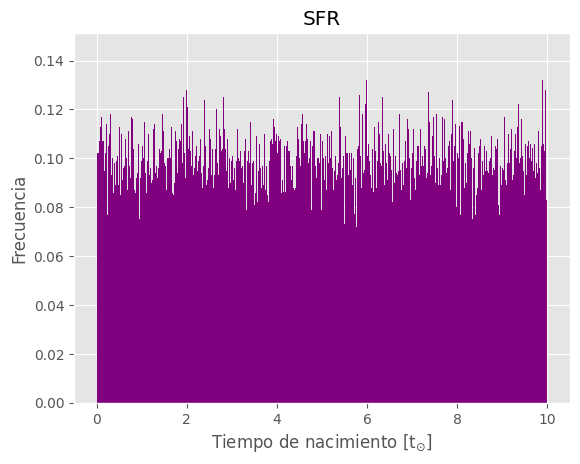

In [24]:
#PARTE 2
tb_min=0
tb_max=10
time_birth=np.random.uniform(tb_min,tb_max,1000000)

counts,bins,_ =plt.hist(time_birth, bins=10000, density=True, color='purple')
plt.title('SFR')
plt.xlabel('Tiempo de nacimiento [t$_{\odot}$]')
plt.ylabel('Frecuencia')

In [25]:
#Remanents
stillMS=[]
outMS=[]
wdwarf=[]
neutron_star1=[]
neutron_star2=[]
neutron_star3=[]
neutron_star4=[]
neutron_star5=[]
bh1=[]
bh2=[]
timeMS=[]
timeoutMS=[]
timeNS=[]
timeWD=[]
timeBH=[]

lifetime_MS=[((10**10)/(i**(2.5))) for i in grupo_masas]
MS_gyr=[i*(1e-9) for i in lifetime_MS]

for i in range(len(MS_gyr)):
    if MS_gyr[i] <= time_birth[i]:
        stillMS.append(grupo_masas[i])
        timeMS.append(time_birth[i])
    else:
        outMS.append(grupo_masas[i])
        timeoutMS.append(time_birth[i])

for i in range(len(outMS)):
    if outMS[i]<=6.5:
        wdwarf.append(outMS[i])
        timeWD.append(timeoutMS[i])
    elif 9<=outMS[i]<=13:
        neutron_star1.append(outMS[i])
        timeNS.append(timeoutMS[i])
    elif 13<outMS[i]<15:
        neutron_star2.append(outMS[i])
        timeNS.append(timeoutMS[i])
    elif 15<=outMS[i]<17.8:
        neutron_star3.append(outMS[i])
        timeNS.append(timeoutMS[i])    
    elif 17.8<=outMS[i]<18.5:
        neutron_star4.append(outMS[i])
        timeNS.append(timeoutMS[i])
    elif 18.5<=outMS[i]<45:
        bh1.append(outMS[i])
        timeBH.append(timeoutMS[i])
    elif 45<=outMS[i]:
        bh2.append(outMS[i])
        timeBH.append(outMS[i])

Text(0.5, 1.0, 'Edad componentes estelares ')

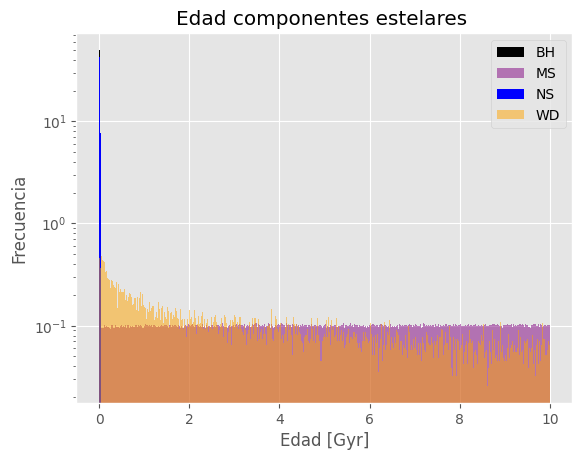

In [26]:
plt.hist(timeBH, bins=500, label='BH', color='black', alpha=1, range=(tb_min,tb_max), density=True, zorder=1)
plt.hist(timeMS, bins=500, label='MS', color='purple', alpha=.5, range=(tb_min,tb_max), density=True)
plt.hist(timeNS, bins=500, label='NS', color='blue', alpha=1, range=(tb_min,tb_max), density=True)
plt.hist(timeWD, bins=500, label='WD', color='orange', alpha=.5, range=(tb_min,tb_max), density=True)
plt.yscale('log')
#plt.xlim(0,1)
plt.xlabel('Edad [Gyr]')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.title('Edad componentes estelares ')

In [27]:
#IFMR
Mbhc1= [-2.049+(0.414*i) for i in bh1]
Mbha1= [15.52-0.3294*(i-25.97)-0.02121*(i-25.97)**2+0.00312*(i-25.97)**3 for i in bh1]
Mfinal_bh1= [(0.9*i)+(1-0.9)*j for i,j in zip(Mbhc1, Mbha1)]
Mfinal_bh2= [5.697+(7.8598*10**8*i**(-4.858)) for i in bh2]
Mfinal_wd=[(0.109*i)+0.394 for i in wdwarf]
Mfinal_ns1=[2.24+(0.508*(i-14.75))+(0.125*(i-14.75)**2)+(0.011*(i-14.75)**3) for i in neutron_star1]
Mfinal_ns2=[0.123+(0.112*i) for i in neutron_star2]
Mfinal_ns3=[0.996+(0.0384*i) for i in neutron_star3]
Mfinal_ns4=[-0.02+(0.1*i) for i in neutron_star4]

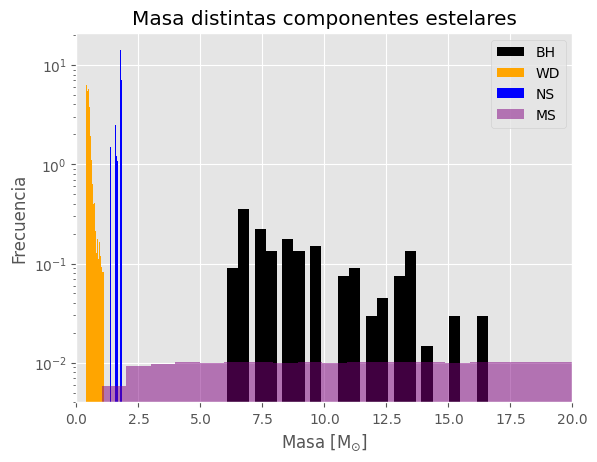

In [28]:
plt.hist([Mfinal_bh1,Mfinal_bh2], bins=10, density=True, label='BH', color=['black', 'black'])
plt.hist(Mfinal_wd, bins=100, density=True, label='WD', color='orange')
plt.hist([Mfinal_ns1,Mfinal_ns2,Mfinal_ns3, Mfinal_ns4], bins=10, density=True, label='NS', color=['blue','blue','blue','blue'], alpha=1)
plt.hist(stillMS, bins=100, density=True, label='MS', color='purple', alpha=0.5)
#plt.xlim(0,16.5)
plt.xlabel('Masa [M$_{\odot}$]')
plt.yscale('log')
plt.ylabel('Frecuencia')
plt.xlim(0,20)
plt.legend()
plt.title('Masa distintas componentes estelares')
plt.show()

In [29]:
print('razón de WD:', len(wdwarf)/len(grupo_masas))
print('razón de MS:', len(stillMS)/len(grupo_masas))
print('razón de BH:', len(timeBH)/len(grupo_masas))
print('razón de NS:', len(timeNS)/len(grupo_masas))
#print((len(wdwarf)/len(grupo_masas))+(len(stillMS)/len(grupo_masas))+(len(timeBH)/len(grupo_masas))+(len(timeNS)/len(grupo_masas)))

razón de WD: 0.015577
razón de MS: 0.984033
razón de BH: 8e-05
razón de NS: 0.000164
